<strong>Import Konten</strong>

In [ ]:
# Mencetak nama dan NPM
print('Nama: Aditya Rimandi Putra')  # Mencetak nama lengkap
print('NPM : 41155050210030\n')       # Mencetak Nomor Pokok Mahasiswa (NPM)

import pandas as pd  # Mengimpor library pandas untuk manipulasi data
import os           # Mengimpor library os untuk berinteraksi dengan sistem file

# Menentukan path ke file konsumen.csv
folder_path = os.path.join(os.getcwd(), 'content')  # Menggabungkan path saat ini dengan folder 'content'
file_path = os.path.join(folder_path, 'konsumen.csv')  # Menggabungkan folder_path dengan nama file 'konsumen.csv'

Nama: Aditya Rimandi Putra
NPM : 41155050210030



In [57]:
# Path ke folder 'content'
folder_path = './content'  # Menentukan path relatif ke folder 'content', sesuaikan dengan lokasi folder Anda

# Memeriksa apakah folder ada
if os.path.exists(folder_path):  # Mengecek apakah folder dengan path yang ditentukan ada
    # Menampilkan isi folder
    files = os.listdir(folder_path)  # Mengambil daftar file dan folder yang ada di dalam folder 'content'
    print(f"Isi folder '{folder_path}':")  # Mencetak pesan yang menunjukkan isi folder
    for file in files:  # Melakukan iterasi untuk setiap file dalam daftar
        print(file)  # Mencetak nama file
else:
    print(f"Folder '{folder_path}' tidak ditemukan.")  # Menampilkan pesan jika folder tidak ditemukan

Isi folder './content':
konsumen.csv


<strong>Import Library</strong>

In [59]:
# Mencetak nama dan NPM
print('Nama: Aditya Rimandi Putra')  # Mencetak nama lengkap
print('NPM : 41155050210030\n')       # Mencetak Nomor Pokok Mahasiswa (NPM)

# Mengimpor library yang akan digunakan
import warnings  # Mengimpor library untuk mengelola peringatan
import time      # Mengimpor library untuk fungsi terkait waktu
import matplotlib.pyplot as plt  # Mengimpor library untuk visualisasi data
import numpy as np  # Mengimpor library untuk operasi numerik dan array
import pandas as pd  # Mengimpor library untuk manipulasi dan analisis data
from sklearn.cluster import KMeans  # Mengimpor algoritma KMeans dari library scikit-learn untuk clustering

Nama: Aditya Rimandi Putra
NPM : 41155050210030



<strong>Menyiapkan Dataset</strong>

In [60]:
# Mencetak nama dan NPM
print('Nama: Aditya Rimandi Putra')  # Mencetak nama lengkap
print('NPM : 41155050210030\n')       # Mencetak Nomor Pokok Mahasiswa (NPM)

# Menyiapkan data dan memanggil dataset
dataset = pd.read_csv('content/konsumen.csv')  # Membaca file CSV 'konsumen.csv' dari folder 'content' dan menyimpannya dalam variabel dataset
dataset.keys()  # Menampilkan kunci (nama kolom) dari dataset yang telah dimuat

Nama: Aditya Rimandi Putra
NPM : 41155050210030



Index(['Salary', ' xpenses'], dtype='object')

In [61]:
# Menampilkan 5 baris data pertama dari dataset tersebut
dataku = pd.DataFrame(dataset)  # Mengonversi dataset menjadi DataFrame dan menyimpannya dalam variabel 'dataku'
dataku.head()  # Menampilkan 5 baris pertama dari DataFrame 'dataku'

,Salary,xpenses
0,2500,1750
1,3800,4200
2,3900,3800
3,4350,5500
4,4400,3200


In [62]:
# Konversi ke data array
X = np.asarray(dataset)  # Mengonversi DataFrame 'dataset' menjadi array NumPy dan menyimpannya dalam variabel 'X'
print(X)  # Mencetak array 'X' ke layar

[[ 2500  1750]
 [ 3800  4200]
 [ 3900  3800]
 [ 4350  5500]
 [ 4400  3200]
 [ 5500  5450]
 [ 5600  5950]
 [ 5750  4100]
 [ 6850  6050]
 [ 6900  8500]
 [ 7250  9500]
 [ 7350  6050]
 [ 7500  8500]
 [ 7800  9500]
 [ 8200  8300]
 [ 8500  6500]
 [ 8550  8400]
 [ 8750  6000]
 [ 9100 10500]
 [ 9100  8500]]


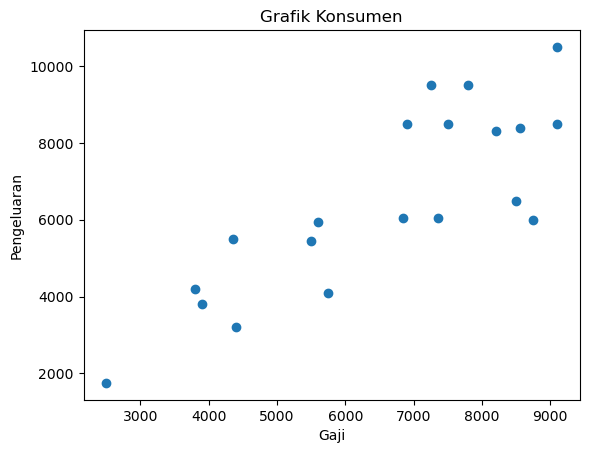

In [63]:
# Menampilkan data dalam bentuk scatter plot
plt.scatter(X[:, 0], X[:, 1], label='True Position')  # Membuat scatter plot dengan sumbu X dari kolom pertama dan sumbu Y dari kolom kedua array 'X'
plt.xlabel("Gaji")  # Menambahkan label untuk sumbu X
plt.ylabel("Pengeluaran")  # Menambahkan label untuk sumbu Y
plt.title("Grafik Konsumen")  # Menambahkan judul untuk grafik
plt.show()  # Menampilkan grafik scatter plot

<strong>Menggunakan Library K Means Clustering</strong>

In [64]:
# Mencetak nama dan NPM
print('Nama: Aditya Rimandi Putra')  # Mencetak nama
print('NPM : 41155050210030\n')  # Mencetak NPM

# Mengabaikan peringatan dari sklearn (dapat diaktifkan jika diperlukan)
# warnings.filterwarnings("ignore", category=User Warning, module="sklearn")

# Inisialisasi variabel untuk menyimpan OMP_NUM_THREADS dengan waktu eksekusi terendah
lowest_time = float('inf')  # Set waktu awal sebagai yang sangat besar
omp_value = None  # Menyimpan jumlah thread yang menghasilkan waktu terendah

# Percobaan untuk berbagai jumlah thread
for threads in [1, 4, 8, 16]:  # Menguji jumlah thread yang berbeda
    os.environ["OMP_NUM_THREADS"] = str(threads)  # Mengatur jumlah thread untuk OpenMP
    kmeans = KMeans(n_clusters=2)  # Inisialisasi model KMeans dengan 2 cluster
    start_time = time.time()  # Mulai pencatatan waktu
    kmeans.fit(X)  # Latih model KMeans dengan data X
    exec_time = time.time() - start_time  # Hitung waktu eksekusi
    print(f"OMP_NUM_THREADS={threads}, Waktu Eksekusi: {exec_time:.2f} detik")  # Mencetak waktu eksekusi

    # Cek apakah waktu eksekusi saat ini lebih rendah dari waktu sebelumnya
    if exec_time < lowest_time:  # Jika waktu eksekusi saat ini lebih rendah
        lowest_time = exec_time  # Update waktu terendah
        omp_value = threads  # Simpan jumlah thread yang menghasilkan waktu terendah

# Optimal OMP_NUM_THREADS
os.environ["OMP_NUM_THREADS"] = str(omp_value)  # Mengonversi omp_value menjadi string dan mengatur jumlah thread optimal

# Mengaktifkan K Means dengan jumlah K = 2
kmeans = KMeans(n_clusters=2)  # Inisialisasi model KMeans dengan 2 cluster
kmeans.fit(X)  # Latih model KMeans dengan data X

Nama: Aditya Rimandi Putra
NPM : 41155050210030

OMP_NUM_THREADS=1, Waktu Eksekusi: 0.04 detik
OMP_NUM_THREADS=4, Waktu Eksekusi: 0.05 detik
OMP_NUM_THREADS=8, Waktu Eksekusi: 0.05 detik
OMP_NUM_THREADS=16, Waktu Eksekusi: 0.05 detik


KMeans(n_clusters=2)

In [65]:
# Menampilkan nilai centroid
# yang dihasilkan oleh algoritma KMeans
print(kmeans.cluster_centers_)  # Mencetak nilai centroid dari setiap cluster yang dihasilkan oleh model KMeans

[[4475.   4243.75]
 [7987.5  8025.  ]]


In [66]:
# Menampilkan label untuk setiap data point
print(kmeans.labels_)  # Mencetak label yang diberikan oleh model KMeans untuk setiap data point dalam dataset

[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


<strong>Menampilkan Output</strong>

Nama: Aditya Rimandi Putra
NPM : 41155050210030



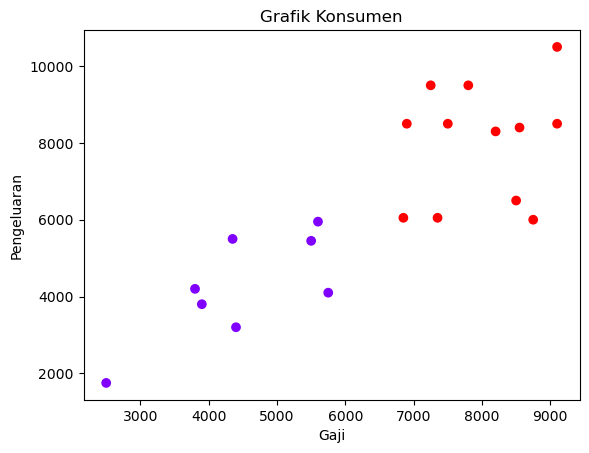

In [67]:
# Mencetak nama dan NPM
print('Nama: Aditya Rimandi Putra')  # Mencetak nama
print('NPM : 41155050210030\n')  # Mencetak NPM

# Plot data point
# Memvisualisasikan bagaimana data telah dikelompokkan (di-klasterisasi).
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')  # Membuat scatter plot dari data point dengan warna berdasarkan label cluster
plt.xlabel("Gaji")  # Menambahkan label sumbu X
plt.ylabel("Pengeluaran")  # Menambahkan label sumbu Y
plt.title("Grafik Konsumen")  # Menambahkan judul pada grafik
plt.show()  # Menampilkan grafik

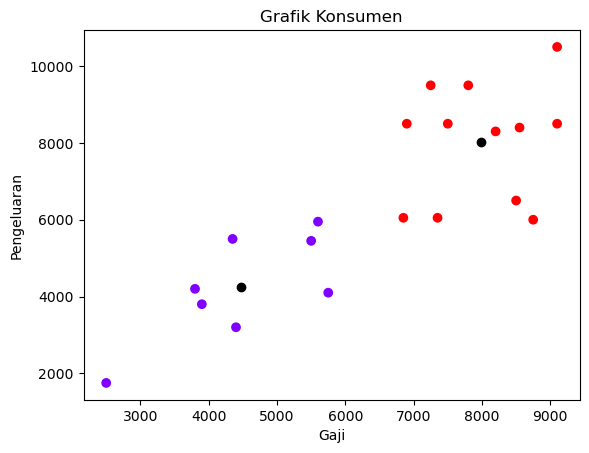

In [68]:
# Plot data point
# Memvisualisasikan bagaimana data telah dikelompokkan (di-klasterisasi).
# Menampilkan centroid dengan warna hitam.
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')  # Membuat scatter plot dari data point dengan warna berdasarkan label cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')  # Menambahkan centroid ke plot dengan warna hitam
plt.xlabel("Gaji")  # Menambahkan label sumbu X
plt.ylabel("Pengeluaran")  # Menambahkan label sumbu Y
plt.title("Grafik Konsumen")  # Menambahkan judul pada grafik
plt.show()  # Menampilkan grafik

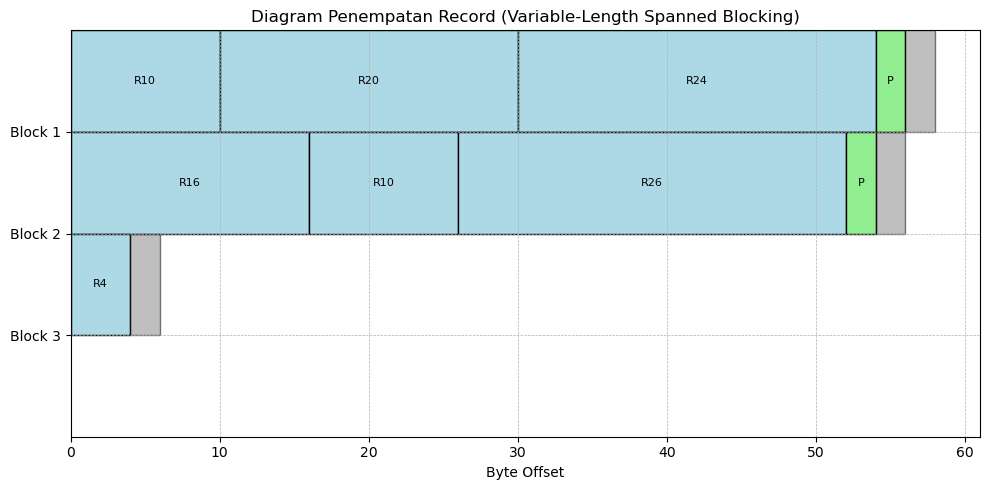

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Parameters
block_size = 56
effective_size = 54
IBG = 2
pointer_size = 2

# Record sizes
records = [10, 20, 40, 10, 30]

# Block construction
blocks = []
current_block = []
current_space = effective_size

for record in records:
    if record <= current_space:
        current_block.append(record)
        current_space -= record
    else:
        # Add what fits in the current block
        part1 = current_space
        current_block.append(part1)
        blocks.append(current_block)

        # Start a new block with the remaining space and a pointer
        part2 = record - part1
        current_block = [part2]
        current_space = effective_size - part2 - pointer_size

# Add the last block
if current_block:
    blocks.append(current_block)

# Visualization
fig, ax = plt.subplots(figsize=(10, 5))
y_offset = 0

for block_idx, block in enumerate(blocks):
    x_offset = 0
    for record in block:
        rect = patches.Rectangle((x_offset, -y_offset), record, 1, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(x_offset + record / 2, -y_offset + 0.5, f"R{record}", ha='center', va='center', fontsize=8)
        x_offset += record
    
    # Add pointer space if block is not the last one
    if block_idx < len(blocks) - 1:
        rect = patches.Rectangle((x_offset, -y_offset), pointer_size, 1, edgecolor='black', facecolor='lightgreen')
        ax.add_patch(rect)
        ax.text(x_offset + pointer_size / 2, -y_offset + 0.5, "P", ha='center', va='center', fontsize=8)
        x_offset += pointer_size

    # Add IBG space
    rect = patches.Rectangle((x_offset, -y_offset), IBG, 1, edgecolor='black', facecolor='grey', alpha=0.5)
    ax.add_patch(rect)
    x_offset += IBG

    y_offset += 1

# Labels and formatting
ax.set_xlim(0, block_size + 5)
ax.set_ylim(-len(blocks), 1)
ax.set_yticks([-i for i in range(len(blocks))])
ax.set_yticklabels([f"Block {i+1}" for i in range(len(blocks))])
ax.set_xlabel("Byte Offset")
ax.set_title("Diagram Penempatan Record (Variable-Length Spanned Blocking)")
ax.set_aspect('auto')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
